<a href="https://colab.research.google.com/github/Jugranada/Aprendizaje_Maquina/blob/main/talleres/Ejercicios_Introduction_Recurrent_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento de secuencias con redes neuronales recurrentes

- En general, muchos problemas en ciencia de datos, requieren del procesado de datos sencuenciales, generalmente asociados al tiempo (series de tiempo).

- En ese sentido, sea la serie de datos $\{x_t\in\mathbb{R}\}_{t=1}^T$.

- Suponga que se define el modelo predictivo probabilístico de la forma:

$$x_t \sim P(x_t|x_{t-1},\dots,x_1)$$

- En general, el estudio de datos secuenciales se puede atacar desde dos aproximaciones básicas: i) modelos autorregresivos , y ii) modelos autorregresivos de variable latente.

# Modelos autorregresivos

- Dichos modelos fijan una dependencia temporal de orden $\tau$.

- Por ende, el número de puntos requeridos para realizar predicciones para $t > \tau$ se mantiene fijo, dado que se asume:

$$x_t \sim P(x_t|x_{t-1},\dots,x_{t-\tau})$$

# Modelos autorregresivos de variable latente

- Buscan preservar alguna representación latente (memoría) $h_t$ de las observaciones pasadas, y busca actualizar (predecir) la secuencia $x_t$ y la variable latente $h_t$, de la forma:

$$\hat{x}_t = P(x_t|h_t)$$

$$h_t = g(h_{t-1},x_{t-1})$$

![autorregresivo](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/autorregresivo.png?raw=1)

**Nota**: $h_t$ no es observable (latente), por ende debe estimarse desde los datos.

- En estadística, el concepto de dinámica que no cambia (patrón regular) se conoce como estacionario. En este sentido, podemos tener un estimado de la secuencia completa utilizando un modelo probabilístico de la forma:

$$P(x_1,x_2,\dots,x_T) = \prod^T_{t=1}P(x_t|x_{t-1},\dots,x_1)$$
donde el estimado de la probabilidad condicional se puede realizar mediante regresores o clasficadores para eventos continuos o discretos, respectivamente.



# Modelos Markovianos

- En los modelos autorregresivos la estimación de $x_t$ se basa en una ventana de tamaño $\tau$, de la forma $x_{t-1},\dots,x_{t-\tau}$.

- Para cuando dicha aproximación es correcta, se dice que la secuencia de datos cumple con la condición Markoviana.

- Para $\tau=1$, se tiene un modelo de Markov de primer orden:

$$P(x_1,x_2,\dots,x_T)=\prod_{t=1}^T P(x_t|x_{t-1})$$
con $P(x_1|x_0)=P(x_1).$





# Ejercicio 1:

- Consultar el modelo y principio de optimización de los modelos de media móvil ([Moving average - MA](https://en.wikipedia.org/wiki/Moving-average_model)), autorregresivos de media móvil ([Autorregresive moving average - ARMA](https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model)) y autorregresivo integrado de media móvil ([Autoregressive integrated moving average](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average)). Cuáles son sus relaciones con los modelos Markovianos?.

### Introducción a las RNN

Las Redes Neuronales Recurrentes (RNN) son modelos diseñados para trabajar con datos secuenciales, es decir, datos donde el orden importa. A diferencia de una red neuronal tradicional, una RNN mantiene una “memoria” interna que le permite procesar una entrada teniendo en cuenta información previa. Esto las hace útiles para tareas como series de tiempo, procesamiento de lenguaje y secuencias de imágenes.

###RNN aplicada a imágenes

Aunque las imágenes no son secuencias de forma natural, pueden tratarse como tal si se interpretan las filas de la imagen como pasos temporales.
En datasets como MNIST o Fashion-MNIST, cada imagen es de 28×28 píxeles. Al alimentar una RNN, se toma cada una de las 28 filas como un “paso de tiempo”, donde cada fila tiene 28 valores.

###Objetivo del ejercicio

Entrenar un modelo RNN sencillo para clasificar imágenes de dos datasets diferentes:

Fashion-MNIST: prendas de vestir (zapatos, camisetas, vestidos, etc.)

MNIST dígitos: números escritos a mano (0 a 9)

###Estructura del modelo

El modelo utilizado consiste en:

Una capa SimpleRNN de 64 unidades, que procesa las 28 filas como secuencia.

Una capa densa de salida con 10 neuronas y softmax para clasificar en 10 categorías.

###Por qué usar RNN aquí

Aunque CNNs funcionan mejor para imágenes, este ejercicio permite:

Comprender cómo una RNN procesa secuencias.

Ver cómo una imagen puede reinterpretarse como un conjunto de pasos temporales.

Comparar el rendimiento entre los dos datasets usando la misma arquitectura.

# Redes neuronales recurrentes - Recurrent neural networks (RNN)

- Hasta el momento hemos trabajado con datos estructurados tipo tabla, en donde las muestras se asumen independientes e identicamente distribuidas (i.i.d.).

- Sin embargo, para datos secuenciales, la suposición i.i.d no es apropiada, y se requiren de arquitecturas que codifiquen dicha secuencialidad.

- Por ejemplo, en el caso de datos tipo imagen, la relación espacial debe ser codificada apropiadamente, como en el caso de las arquitecturas convolucionales ([Convolutional Neural Networks](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/3_Introduccion_CNN.ipynb)).

- En este sentido, las RNN pretenden explotar la codificación mediante variables latentes, para aproximar el modelado de la incertidumbre de la secuencia como:


$$P(x_t|x_{t-1},\dots,x_1)\approx P(x_t|h_{t-1})$$

donde el estado oculto $h_{t-1}$ (hidden state) codifica la información relevante de la secuencia hasta $t-1$.

- Además, el estado oculto en $t$ se puede calcular a partir de $x_t$ y $h_{t-1},$ como:

$$h_t=f(x_t,h_{t-1})$$

**Nota**: se podría utilizar como $h_t$ todo el vector de datos $x_t,x_{t-1},\dots,x_1$; no obstante, el costo computacional y de memoría sería muy alto.

## Las RNN son redes neuronales con estados ocultos!

- Considere una matriz (mini-lote) de $P$ características desde datos secuenciales $\mathbf{X}_t\in\mathbb{R}^{N\times P}$, es decir, tenemos $N$ trayectorias con $P$ mediciones de una secuencia en el instante $t$.

- Sea $\mathbf{H}_t\in\mathbb{R}^{N \times h}$ la variable oculta (latente) para el instante $t$, la estimación de dicha variable respecto a la entrada actual y a la variable oculta en $t-1$ se puede modelar mediante RNN como:

$$\mathbf{H}_t = \phi(\mathbf{X}_t \mathbf{W}+\mathbf{H}_{t-1}\mathbf{S} + \mathbf{b}),$$

donde $\mathbf{W}\in\mathbb{R}^{P \times h},$ $\mathbf{S}\in\mathbb{R}^{h \times h},$ $\mathbf{b}\in\mathbb{R}^{h}$ y $\phi(\cdot)$ es una función de activación no lineal.

- Si se desea calcular la salida $\mathbf{O}_t\in\mathbb{R}^{N\times Q}$, se puede utilizar la información del estado oculto de la forma:

$$\mathbf{O}_t = \mathbf{H}_t\mathbf{A}+\mathbf{c},$$
donde $\mathbf{A}\in\mathbb{R}^{h\times Q}$, $\mathbf{c}\in\mathbb{R}^{Q}.$

**Esquema de una RNN con un estado oculto:**

![rnn](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/rnn.png?raw=1)



- A continuación se presenta algunos ejemplos sobre Tensorflow para RNN.

In [ ]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
#-------------------------------------------------------------------------------
np.random.seed(42)
tf.random.set_seed(42)
#-------------------------------------------------------------------------------
#
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
#-------------------------------------------------------------------------------

Generamos el conjunto de series de tiempo a analizar

In [ ]:
#-------------------------------------------------------------------------------
# definimos función para generar señales 1D-------------------------------------
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time   = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)
#-------------------------------------------------------------------------------

In [ ]:
#-------------------------------------------------------------------------------
# definimos número de steps y batch_size----------------------------------------
n_steps    = 50
batch_size = 10000
#-------------------------------------------------------------------------------
series           = generate_time_series(batch_size, n_steps + 1)
print('Series dimension:',series.shape)
#-------------------------------------------------------------------------------
# partimos en conjuntos de train/valid/test-------------------------------------
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]
#-------------------------------------------------------------------------------
print('Train dimensions:',X_train.shape, y_train.shape)
print('Valid dimensions:',X_valid.shape, y_valid.shape)
print('Test dimensions:',X_test.shape, y_test.shape)
#-------------------------------------------------------------------------------

Series dimension: (10000, 51, 1)
Train dimensions: (7000, 50, 1) (7000, 1)
Valid dimensions: (2000, 50, 1) (2000, 1)
Test dimensions: (1000, 50, 1) (1000, 1)


$[y_{t+P},\dots,y_{t}] = f(y_{t-1},\dots,y_{t-\tau},x_{t},x_{t-1},\dots,x_{t-\tau})$

In [ ]:
#-------------------------------------------------------------------------------
y_train # vector de salida
#-------------------------------------------------------------------------------

array([[-0.35489398],
       [ 0.11629631],
       [-0.35395944],
       ...,
       [ 0.04946356],
       [-0.26231018],
       [ 0.60062087]], dtype=float32)

Generamos la gráfica de las series de tiempo creadas

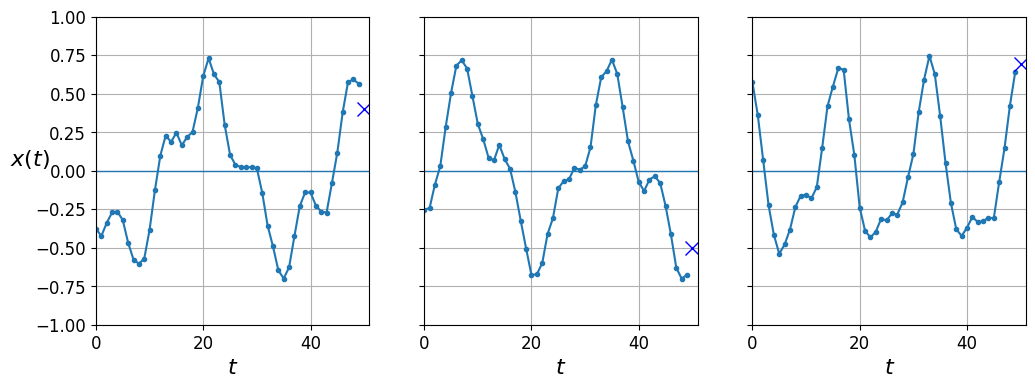

In [ ]:
#-------------------------------------------------------------------------------
# definimos función para graficar las series------------------------------------
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
#-------------------------------------------------------------------------------
# graficamos 3 series del set validation----------------------------------------
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
plt.show()
#-------------------------------------------------------------------------------

# Predicción ingenua (solo predecir el último valor):

- Para ilustrar el concepto de secuencialidad, utilizaremos un predictor ingenuo, en donde la salida actual sería igual al valor en el instante anterior:

$$x_t = x_{t-1}$$

In [ ]:
#-------------------------------------------------------------------------------
# asumimos que el valor ha estimar es el último elemento de la serie----------------
y_pred = X_test[:, -1]
#-------------------------------------------------------------------------------
# calculamos el MSE entre el y_valid vs. y_pred---------------------------------

print('MSE:',np.mean(keras.losses.mse(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------

MSE: 2.1811275 %


- El error cálculado no es tan grande aparentemente.

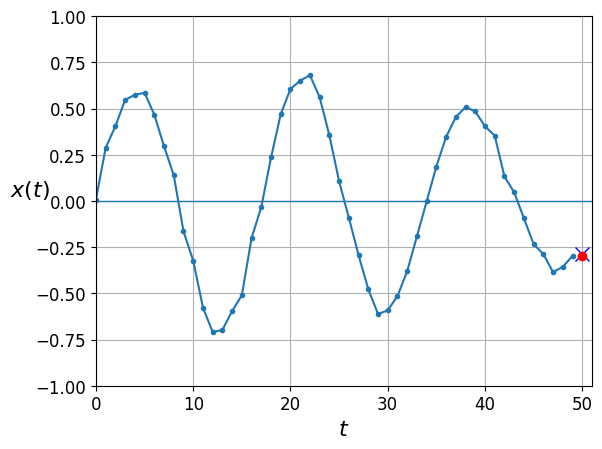

In [ ]:
#-------------------------------------------------------------------------------
# graficamos valor estimado----------------------------------------------------
plot_series(X_test[2, :, 0], y_test[2, 0], y_pred[2, 0])
plt.show()
#-------------------------------------------------------------------------------

# Predicción lineal

- Ahora utilizaremos un modelo lineal simple.

- Recuerde que como generamos ventanas, podrimos entender esta aproximación como un modelo autorregresivo simple (sin variables latentes):

$$x_t \sim P(x_t|x_{t-1},\dots,x_{t-\tau})$$

donde la estimación de la condicional se realiza mediante un regresor con capas densas.



$\mathbf{X}=[\mathbf{x}_n]\in \mathbb{R}^{N \times P}$

$\mathbf{x}_n =[y_{n-1},y_{n-2},\dots, y_{n-\tau}]$

$\mathbf{y}\in \mathbb{R}^T$

$f(\mathbf{x}_n)=\mathbf{x}_n\mathbf{w}=x_{n1}w_1+\dots+x_{nP}w_P$

$f(\mathbf{x}_n)= y_{n-1}w_1+\dots+y_{n-\tau}w_P = \hat{y}_n$

$P = \tau$

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

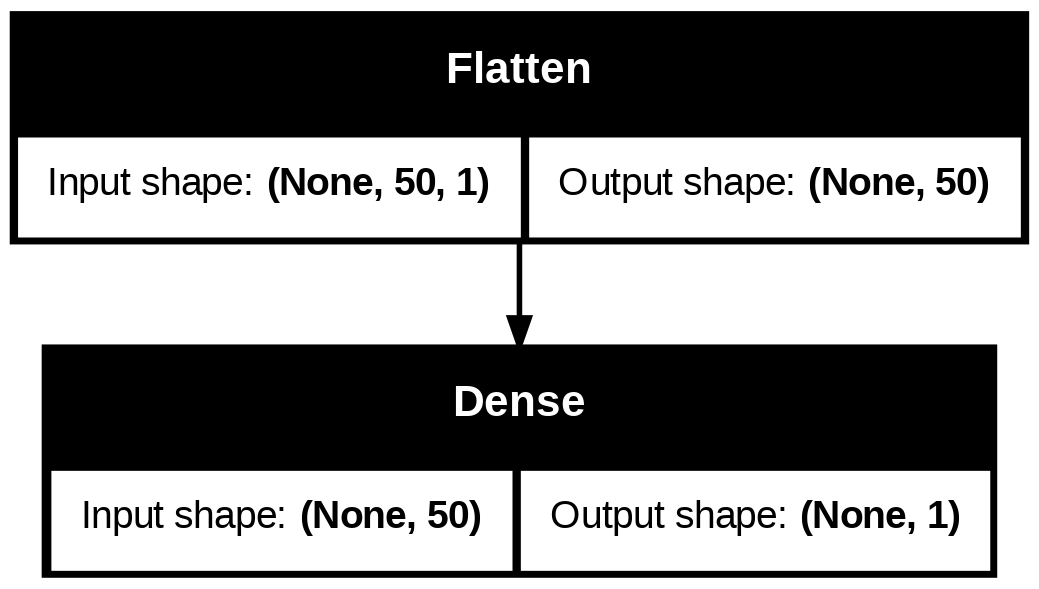

In [ ]:
#-------------------------------------------------------------------------------
# definimos un modelo secuencial------------------------------------------------
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])
#-------------------------------------------------------------------------------
model.summary()
#-------------------------------------------------------------------------------
keras.utils.plot_model(model, "my_model_series.png", show_shapes=True)
#-------------------------------------------------------------------------------

Compilamos y ajustamos el modelo usando los datos de train y validation

In [ ]:
epochs = 20
#-------------------------------------------------------------------------------
model.compile(loss="mse", optimizer="adam")
#-------------------------------------------------------------------------------
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.2447 - val_loss: 0.0730
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0602 - val_loss: 0.0349
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0313 - val_loss: 0.0226
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0211 - val_loss: 0.0175
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0166 - val_loss: 0.0148
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0141 - val_loss: 0.0130
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0124 - val_loss: 0.0116
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0110 - val_loss: 0.0104
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0099 - val_loss: 0.0094
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0089 - val_loss: 0.0085
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0081 - val_loss: 0.0078
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

In [ ]:
#-------------------------------------------------------------------------------
# verificamos evluación del modelo---------------------------------------------
y_pred = model.predict(X_test)
print('MSE:',np.mean(keras.losses.mse(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MSE: 0.46712705 %


El resultado es mucho mejor que el predictor ingenuo.

Graficamos el desempeño del modelo secuencial

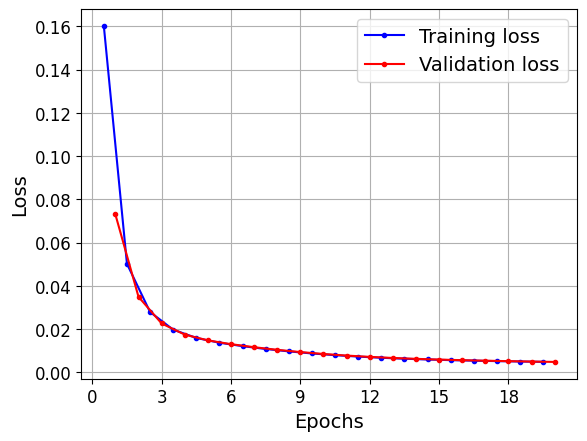

In [ ]:
#-------------------------------------------------------------------------------
# definimos una función para plot de curvas de aprendizaje----------------------
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    #plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
#-------------------------------------------------------------------------------
# llamamos función de plot------------------------------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

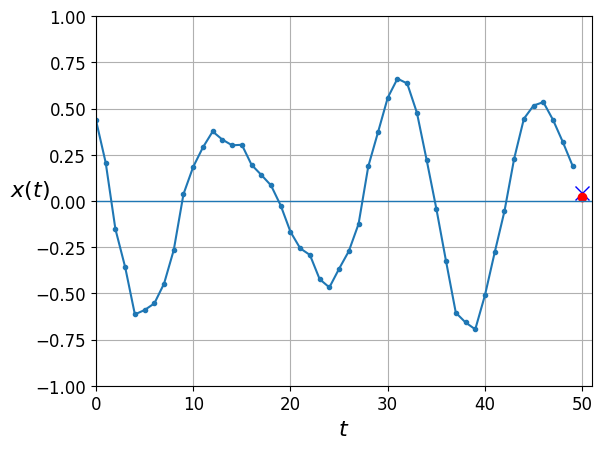

In [ ]:
#-------------------------------------------------------------------------------
# pintamos series y predicciones------------------------------------------------
plot_series(X_test[0, :, 0], y_test[0, 0], y_pred[0, 0])
plt.show()
#-------------------------------------------------------------------------------

# Predicciones con RNN

- Keras tiene implementado las [capas simples de RNN](https://keras.io/api/layers/recurrent_layers/simple_rnn/).

- Por defecto la activación no lineal utilizada es la `tanh`, aunque se puede trabajar con las vistas en módulos anteriores.

- En este caso se define una única capa RNN con una neurona, dado que tenemos una única salida a predecir.

In [ ]:
#-------------------------------------------------------------------------------
# definimos modelo secuencial de RNN simple-------------------------------------
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1], )
])
#-------------------------------------------------------------------------------
# compilamos el modelo RNN------------------------------------------------------
optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mse", optimizer=optimizer)
#-------------------------------------------------------------------------------
# entrenamos el modelo y lo ajustamos con los datos de valid--------------------
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1441 - val_loss: 0.0626
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0433 - val_loss: 0.0153
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0136 - val_loss: 0.0117
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0120 - val_loss: 0.0114
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0117 - val_loss: 0.0111
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0116 - val_loss: 0.0110
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - val_loss: 0.0110
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0

In [ ]:
#-------------------------------------------------------------------------------
# verificamos evluación del modelo---------------------------------------------
y_pred = model.predict(X_test)
print('MSE:',np.mean(keras.losses.mse(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
MSE: 1.1326917 %


Graficamos el performance de la Simple RNN

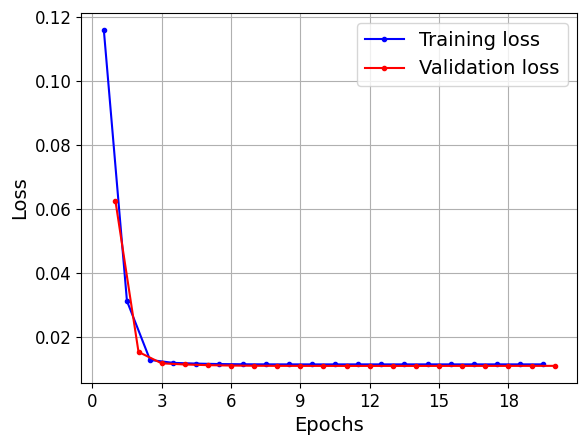

In [ ]:
#-------------------------------------------------------------------------------
# graficamos curvas de aprendizaje----------------------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

Se analiza la predicción

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


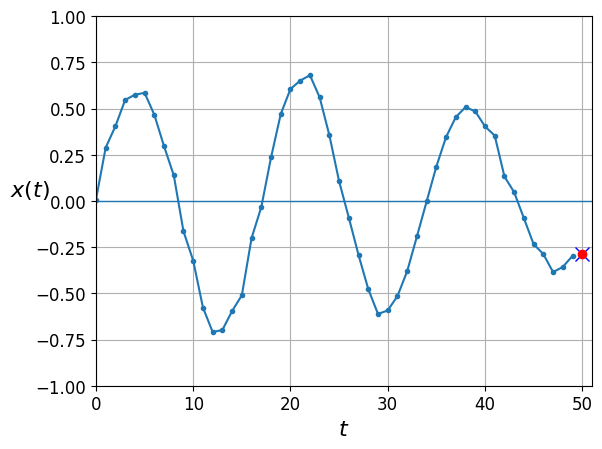

In [ ]:
#-------------------------------------------------------------------------------
# evaluamos sobre set de X_valid------------------------------------------------
y_pred = model.predict(X_test)
# pintamos la serie y la predicción---------------------------------------------
plot_series(X_test[2, :, 0], y_test[2, 0], y_pred[2, 0])
plt.show()
#-------------------------------------------------------------------------------

# Deep RNNs

- Un modelo profundo de RNN contiene $L$ capas ocultas.

- Sobre cada capa oculta, el estado oculto es actualizado y se pasa al siguiente instante de tiempo de la capa actual y de la capa siguiente:

![deeprnn](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/deeprnn.png?raw=1)

- El modelo recurrente profundo se define entonces como:

$$\mathbf{H}^{(l)}_t = \phi_l\left(\mathbf{H}^{(l-1)}_t \mathbf{W}^{(l)}+\mathbf{H}^{(l)}_{t-1}\mathbf{S}^{(l)} + \mathbf{b}^{(l)}\right),$$

donde $\mathbf{W}^{(l)}\in\mathbb{R}^{h_{l-1} \times h_l},$ $\mathbf{S}^{(l)}\in\mathbb{R}^{h_{l-1} \times h_{l-1}},$ $\mathbf{b}\in\mathbb{R}^{h_l}$ y $\phi_l(\cdot)$ es una función de activación no lineal. $\mathbf{H}^{(0)}_t=\mathbf{X}_t$

- Si se desea calcular la salida $\mathbf{O}_t\in\mathbb{R}^{N\times Q}$, se puede utilizar la información del estado oculto en la capa oculta $L$:

$$\mathbf{O}_t = \mathbf{H}^{(L)}_t\mathbf{A}+\mathbf{c},$$
donde $\mathbf{A}\in\mathbb{R}^{h_L\times Q}$, $\mathbf{c}\in\mathbb{R}^{Q}.$


**Nota:** para aplicar la capa densa de la salida, se puede utilizar una capa `SimpleRNN(1)` con una neurona, o una capa densa aplicada desde la capa [TimeDistributed](https://keras.io/api/layers/recurrent_layers/time_distributed/) para preservar la temporalidad de los datos.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, None, 20)       │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, None, 20)       │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 1)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,282 (5.01 KB)

 Trainable params: 1,282 (5.01 KB)

 Non-trainable params: 0 (0.00 B)

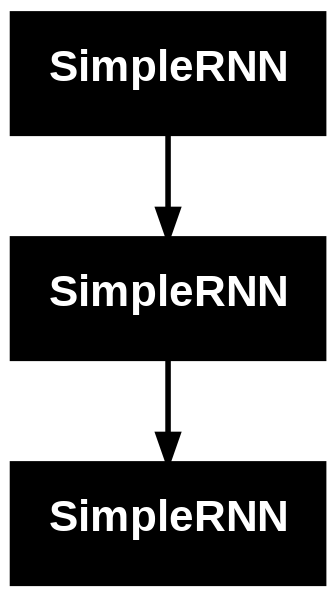

In [ ]:
#-------------------------------------------------------------------------------
# definimos el modelo Deep RNN como un stack de SimpleRNN-----------------------
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1,activation='linear')
    ])
#-------------------------------------------------------------------------------
# pintamos el diagrama de bloques del modelo
model.summary()
tf.keras.utils.plot_model(model)
#-------------------------------------------------------------------------------

# Ejercicio 2

- Para el modelo definido, determine los tamaños de las matrices y vectores de bias en cada capa.

**Nota**: Utilice el método `model.layers[l].get_weights()`

In [ ]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
#-------------------------------------------------------------------------------
np.random.seed(42)
tf.random.set_seed(42)
#-------------------------------------------------------------------------------
#
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
#-------------------------------------------------------------------------------

In [ ]:
#-------------------------------------------------------------------------------
# definimos función para generar señales 1D-------------------------------------
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time   = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)
#-------------------------------------------------------------------------------

In [ ]:
#-------------------------------------------------------------------------------
# definimos número de steps y batch_size----------------------------------------
n_steps    = 50
batch_size = 10000
#-------------------------------------------------------------------------------
series           = generate_time_series(batch_size, n_steps + 1)
print('Series dimension:',series.shape)
#-------------------------------------------------------------------------------
# partimos en conjuntos de train/valid/test-------------------------------------
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]
#-------------------------------------------------------------------------------
print('Train dimensions:',X_train.shape, y_train.shape)
print('Valid dimensions:',X_valid.shape, y_valid.shape)
print('Test dimensions:',X_test.shape, y_test.shape)
#-------------------------------------------------------------------------------

Series dimension: (10000, 51, 1)
Train dimensions: (7000, 50, 1) (7000, 1)
Valid dimensions: (2000, 50, 1) (2000, 1)
Test dimensions: (1000, 50, 1) (1000, 1)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)        │ (None, None, 20)       │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_7 (SimpleRNN)        │ (None, None, 20)       │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_8 (SimpleRNN)        │ (None, 1)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,282 (5.01 KB)

 Trainable params: 1,282 (5.01 KB)

 Non-trainable params: 0 (0.00 B)

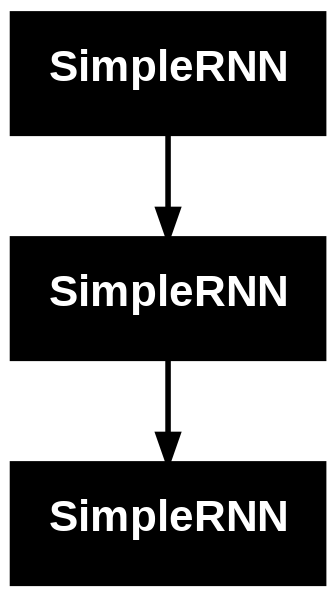

In [ ]:
#-------------------------------------------------------------------------------
# definimos el modelo Deep RNN como un stack de SimpleRNN-----------------------
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1,activation='linear')
    ])
#-------------------------------------------------------------------------------
# pintamos el diagrama de bloques del modelo
model.summary()
tf.keras.utils.plot_model(model)
#-------------------------------------------------------------------------------

In [ ]:
for i, layer in enumerate(model.layers):
    print(f"\nCapa {i}: {layer.name}")
    pesos = layer.get_weights()
    for j, w in enumerate(pesos):
        print(f"  Peso {j}: shape = {w.shape}")


Capa 0: simple_rnn_6
  Peso 0: shape = (1, 20)
  Peso 1: shape = (20, 20)
  Peso 2: shape = (20,)

Capa 1: simple_rnn_7
  Peso 0: shape = (20, 20)
  Peso 1: shape = (20, 20)
  Peso 2: shape = (20,)

Capa 2: simple_rnn_8
  Peso 0: shape = (20, 1)
  Peso 1: shape = (1, 1)
  Peso 2: shape = (1,)


### **Tamaños de las matrices y bias por capa**

### **Capa 1 — SimpleRNN(20, return_sequences=True)**

Entrada: (batch, 50 steps, 1 feature)

Los pesos de una SimpleRNN son tres matrices:

kernel (input → units):
Tamaño: (1, 20)

1 característica de entrada

20 neuronas

recurrent_kernel (units → units):
Tamaño: (20, 20)

conexión recurrente entre las 20 neuronas

bias:
Tamaño: (20,)

### **Capa 2 — SimpleRNN(20, return_sequences=True)**

Entrada: (batch, 50 steps, 20 features)

Pesos:

kernel (input → units):
Tamaño: (20, 20)

recibe 20 características del paso anterior

tiene 20 neuronas

recurrent_kernel (units → units):
Tamaño: (20, 20)

bias:
Tamaño: (20,)

### **Capa 3 — SimpleRNN(1, activation='linear')**

Entrada: (batch, 50 steps, 20 features)

Pesos:

kernel (input → 1 unidad):
Tamaño: (20, 1)

recibe 20 características

produce 1 salida

recurrent_kernel (1 → 1):
Tamaño: (1, 1)

solo una unidad recurrente

bias:
Tamaño: (1,)

In [ ]:
# compilamos el modelo----------------------------------------------------------
model.compile(loss="mse", optimizer="adam")
#-------------------------------------------------------------------------------
# entrenamos y ajustamos el modelo----------------------------------------------
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.0469 - val_loss: 0.0044
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0042 - val_loss: 0.0034
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 

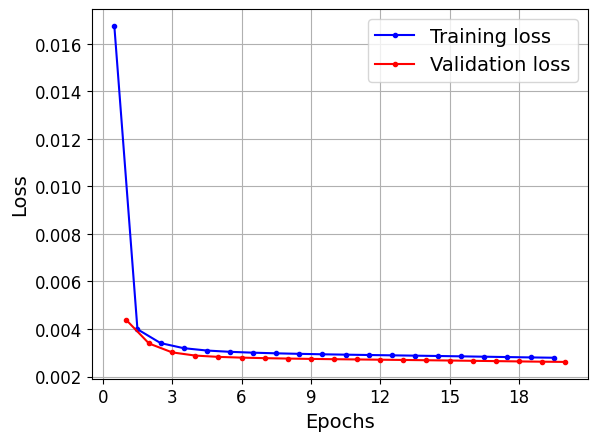

In [ ]:
#-------------------------------------------------------------------------------
# graficamos curvas de aprendizaje----------------------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

In [ ]:
y_train.shape

(7000, 1)

In [ ]:
#-------------------------------------------------------------------------------
# verificamos evluación del modelo---------------------------------------------
y_pred = model.predict(X_test)
#print('MSE:',np.mean(keras.losses.mean_squared_error(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------
y_pred.shape

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


(1000, 1)

Graficamos el performance de la Deep RNN

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


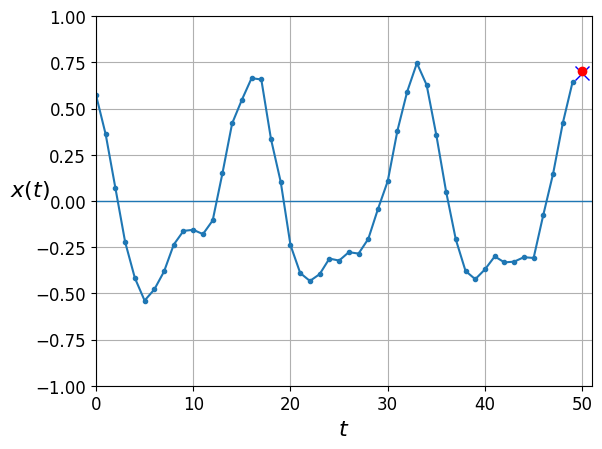

In [ ]:
#-------------------------------------------------------------------------------
# evaluamos sobre set de X_valid------------------------------------------------
y_pred = model.predict(X_valid)
# pintamos la serie y la predicción---------------------------------------------
plot_series(X_valid[2, :, 0], y_valid[2, 0], y_pred[2, 0])
plt.show()
#-------------------------------------------------------------------------------

# Predicir un horizonte más lejano

- Si concatenamos las predicciones de a una muestra, para generar salidas con horizontes más lejanos, podemos estar propangando el error!

In [ ]:
#-------------------------------------------------------------------------------
# definimos nueva semilla aleatoria---------------------------------------------
np.random.seed(43) #
#-------------------------------------------------------------------------------
# generamos nueva series de tiempo----------------------------------------------
series       = generate_time_series(1, n_steps + 10)     # horizonte de 10 valores en el tiempo
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X            = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)
#-------------------------------------------------------------------------------
Y_pred = X[:, n_steps:]
#-------------------------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [ ]:
#-------------------------------------------------------------------------------
# observamos nuevas dimensiones de Y_pred---------------------------------------
Y_pred.shape #horizonte de 10 valores en el tiempo
#-------------------------------------------------------------------------------

(1, 10, 1)

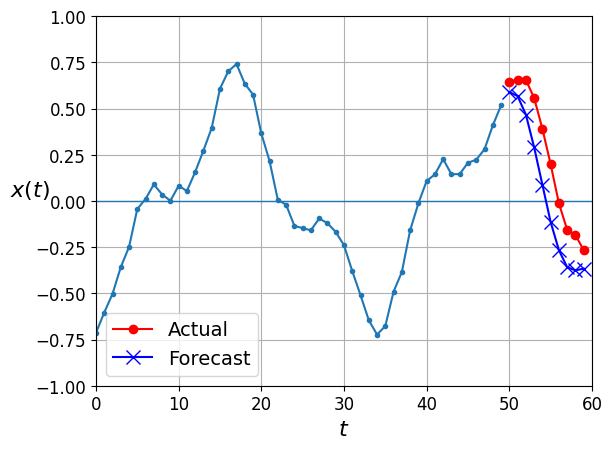

In [ ]:
#-------------------------------------------------------------------------------
# definimos función para pintar forecast----------------------------------------
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)
#-------------------------------------------------------------------------------
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()
#-------------------------------------------------------------------------------

- Lo mejor es entrenar un modelo que incluya como salida target los siguientes $T$ valores a predicir en el horizonte.

- Se requiere entonces generar nuevamente la secuencia con $T-1$ pasos más en el tiempo.

In [ ]:
#-------------------------------------------------------------------------------
# definimos semilla aleatoria---------------------------------------------------
np.random.seed(42)
#-------------------------------------------------------------------------------
n_steps = 50
series = generate_time_series(10000, n_steps + 10)
print('Series dimension:',series.shape)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]
#-------------------------------------------------------------------------------
print('Train dimensions:',X_train.shape, Y_train.shape)
print('Valid dimensions:',X_valid.shape, Y_valid.shape)
print('Test dimensions:',X_test.shape, Y_test.shape)
#-------------------------------------------------------------------------------

Series dimension: (10000, 60, 1)
Train dimensions: (7000, 50, 1) (7000, 10)
Valid dimensions: (2000, 50, 1) (2000, 10)
Test dimensions: (1000, 50, 1) (1000, 10)


Predicción de los siguientes 10 valores (uno a uno y concatenar):

In [ ]:
#-------------------------------------------------------------------------------
# realizamos predicción usando modelo Deep RNN----------------------------------
del X
X = X_valid
for step_ahead in range(10):
    y_pred_one = model.predict(X)[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)
#-------------------------------------------------------------------------------
# obtenemos las predicciones de los siguientes 10 valores-----------------------
Y_pred = X[:, n_steps:, 0]
#-------------------------------------------------------------------------------
print('Y_pred dimensions:', Y_pred.shape)
#-------------------------------------------------------------------------------

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Y_pred dimensions: (2000, 10)


- Error de predicción con horizontes mayores a 1 concatenando salidas:

In [ ]:
#-------------------------------------------------------------------------------
# calculamos el MSE de la predicción--------------------------------------------
print(np.mean(keras.metrics.mse(Y_valid, Y_pred))*100,'%')
#-------------------------------------------------------------------------------

2.9057925 %


Ahora se crea una RNN que permita predecir los siguientes 10 valores en una sola evaluación (predicción multi-salida):

In [ ]:
#-------------------------------------------------------------------------------
# definimos semillas aleatorias-------------------------------------------------
np.random.seed(42)
tf.random.set_seed(42)
#-------------------------------------------------------------------------------
# definimos el modelo secuencial multi-salida-----------------------------------
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10) # capa densa para estimar los siguientes 10 valores
])
#-------------------------------------------------------------------------------
# compilamos el modelo----------------------------------------------------------
model.compile(loss="mse", optimizer="adam")
#-------------------------------------------------------------------------------
# entrenamos y ajustamos el modelo----------------------------------------------
history = model.fit(X_train, Y_train, epochs=epochs,
                    validation_data=(X_valid, Y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0782 - val_loss: 0.0289
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0275 - val_loss: 0.0196
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0172 - val_loss: 0.0142
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0139 - val_loss: 0.0129
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0126 - val_loss: 0.0118
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0118 - val_loss: 0.0109
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0112 - val_loss: 0.0108
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0107 - val_loss: 0.0105
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0104 - val_loss: 0.0099
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0097 - val_loss: 0.0098
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0

In [ ]:
#-------------------------------------------------------------------------------
# generamos nuevos datos, con nueva semilla aleatoria---------------------------
np.random.seed(43)
#-------------------------------------------------------------------------------
# generamos nueva serie de tiempo-----------------------------------------------
series       = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
#-------------------------------------------------------------------------------
print('X_new dimensions:',X_new.shape)
print('Y_new dimensions:',Y_new.shape)
#-------------------------------------------------------------------------------
# hacemos predicción de los 10 últimos valores----------------------------------
Y_pred       = model.predict(X_new)[..., np.newaxis]
print('Y_pred dimensions:',Y_pred.shape)
#-------------------------------------------------------------------------------

X_new dimensions: (1, 50, 1)
Y_new dimensions: (1, 10, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
Y_pred dimensions: (1, 10, 1)


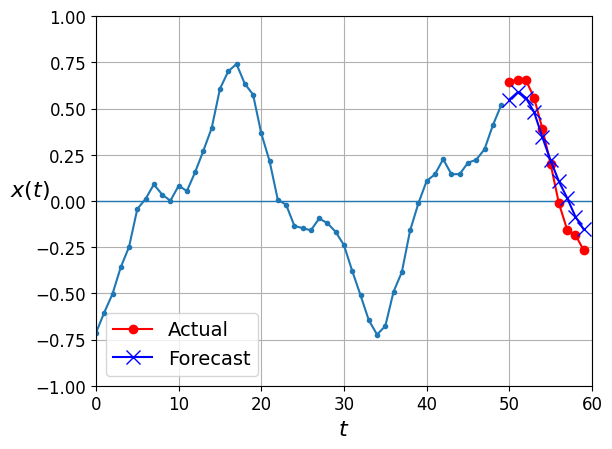

In [ ]:
#-------------------------------------------------------------------------------
# graficamos el forecast--------------------------------------------------------
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()
#-------------------------------------------------------------------------------

- El error de predicción mejora:

In [ ]:
#-------------------------------------------------------------------------------
# calculamos el MSE de la predicción--------------------------------------------
print(np.mean(keras.metrics.mse(Y_new, Y_pred))*100,'%')

0.980387 %


# El problema de las dependencias a largo plazo

- Uno de los atractivos de los RNN es la idea de conectar la información anterior a la tarea actual. Si los RNN pudieran hacer esto, serían extremadamente útiles.

- A veces, solo necesitamos mirar información reciente para realizar la tarea actual.

- Por ejemplo, considere un modelo de lenguaje que intenta predecir la siguiente palabra basándose en las anteriores. Si estamos tratando de predecir la última palabra en la oración:

 "las nubes están en el cielo",

no necesitamos ningún contexto adicional; es bastante obvio que la siguiente palabra será **cielo**.

- En tales casos, donde la brecha entre la información relevante y el lugar que se necesita es pequeña, los RNN pueden aprender a usar la información del pasado.

![rnn_corto](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/rnn_corto.png?raw=1)

- Pero también hay casos en los que necesitamos más contexto. Considere intentar predecir la última palabra del texto:

"Crecí en Francia ... hablo francés con fluidez",

la información reciente sugiere que la siguiente palabra es probablemente el **nombre de un idioma**, pero si queremos delimitar qué idioma, necesitamos el contexto de Francia, desde más atrás.

- Entonces, la brecha entre la información relevante y el punto donde se necesita puede ser grande.

![rnn_largo](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/rnn_largo.png?raw=1)

- En teoría, los RNN son capaces de manejar tales "dependencias a largo plazo". Lamentablemente, en la práctica, las RNN no parecen ser capaces de aprenderlos.

# [LSTM](https://colah.github.io/posts/2015-08-Understanding-LSTMs/): Long short term memory

- La LSTM pretende aprender dependencias largas.

- En general, en LSTM, y su extensión GRU, buscan crear mecanismos que permitan identificar cuando el estado oculto debe ser actualizado y cuando reseteado.

- A diferencia de una capa RNN simple, las LSTMs presenta cuatro (4) capas interactuando:


![lstm](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/lstm.png?raw=1)

con:

$$\mathbf{I}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xi}+\mathbf{H}_{t-1}\mathbf{W}_{hi}+\mathbf{b}_i\right)$$
$$\mathbf{F}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xf}+\mathbf{H}_{t-1}\mathbf{W}_{hf}+\mathbf{b}_f\right)$$
$$\mathbf{O}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xo}+\mathbf{H}_{t-1}\mathbf{W}_{ho}+\mathbf{b}_o\right)$$
$$\tilde{\mathbf{C}}_t = \tanh\left(\mathbf{X}_t\mathbf{W}_{xc}+\mathbf{H}_{t-1}\mathbf{W}_{hc}+\mathbf{b}_c\right)$$
$${\mathbf{C}}_t = \mathbf{F}_t \odot \mathbf{C}_{t-1} + \mathbf{I}_t \odot \tilde{\mathbf{C}}_t $$
$${\mathbf{H}}_t = \mathbf{O}_t \odot \tanh{(\mathbf{C}_{t})} $$


donde $\mathbf{W}_{xi},\mathbf{W}_{xf},\mathbf{W}_{xo}, \mathbf{W}_{xc}\in\mathbb{R}^{P\times h},$ $\mathbf{W}_{hi},\mathbf{W}_{hf},\mathbf{W}_{ho},\mathbf{W}_{hc}\in\mathbb{R}^{h\times h}$ y $\mathbf{b}_{i},\mathbf{b}_{f},\mathbf{b}_{o}, \mathbf{b}_{c}\in\mathbb{R}^{h}$.

- $\mathbf{I}_t$ busca codificar "cuanto" considerar de los datos nuevos y $\mathbf{F}_t$ que tando retenemos de los datos del pasado.

- Si la compuerta de salida se aproxima a 1, pasamos toda la información de la memoría al predictor, pero, si la compuerta de la salida aproxima a 0, se retiene la información en la celda de memoría.


In [ ]:
#-------------------------------------------------------------------------------
# generamos los datos-----------------------------------------------------------
np.random.seed(42)
#-------------------------------------------------------------------------------
# generamos series de tiempo----------------------------------------------------
n_steps = 50
series  = generate_time_series(10000, n_steps + 10)
print('Series dimensions:',series.shape)
#-------------------------------------------------------------------------------
# partimos los datos en train/valid/test----------------------------------------
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test  = series[9000:, :n_steps]
print('X_train dimensions:',X_train.shape)
print('X_valid dimensions:',X_valid.shape)
print('X_test dimensions:',X_test.shape)
#-------------------------------------------------------------------------------
# definimos nuevos Y------------------------------------------------------------
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
print('Y dimensions:',Y.shape)
#-------------------------------------------------------------------------------
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test  = Y[9000:]
#-------------------------------------------------------------------------------
print('Y_train dimensions:', Y_train.shape)
print('Y_valid dimensions:',Y_valid.shape)
print('Y_test dimensions:',Y_test.shape)
#-------------------------------------------------------------------------------

Series dimensions: (10000, 60, 1)
X_train dimensions: (7000, 50, 1)
X_valid dimensions: (2000, 50, 1)
X_test dimensions: (1000, 50, 1)
Y dimensions: (10000, 50, 10)
Y_train dimensions: (7000, 50, 10)
Y_valid dimensions: (2000, 50, 10)
Y_test dimensions: (1000, 50, 10)


**Nota**: En la capa de salida se puede utilizar una capa densa de 10 neuronas (horizonte de 10 valores). No obstante, debe aplicarse la capa [TimeDistributed](https://keras.io/api/layers/recurrent_layers/time_distributed/) para aplicar la operación densa sobre cada tramo de tiempo.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, None, 20)       │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, None, 20)       │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, None, 10)       │           210 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,250 (20.51 KB)

 Trainable params: 5,250 (20.51 KB)

 Non-trainable params: 0 (0.00 B)

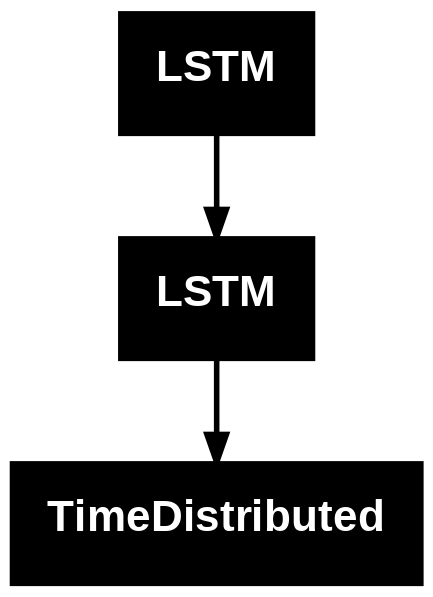

In [ ]:
#-------------------------------------------------------------------------------
# definimos semilla aleatoria---------------------------------------------------
np.random.seed(42)
tf.random.set_seed(42)
#-------------------------------------------------------------------------------
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mse(Y_true[:, -1], Y_pred[:, -1])
#-------------------------------------------------------------------------------
# definimos el modelo secuencial con 2 capas LSTM-------------------------------
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.summary()
tf.keras.utils.plot_model(model)

In [ ]:
#-------------------------------------------------------------------------------
# compilamos el modelo----------------------------------------------------------
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
#-------------------------------------------------------------------------------
# entrenamos y validamos el modelo----------------------------------------------
history = model.fit(X_train, Y_train, epochs=epochs,
                    validation_data=(X_valid, Y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - last_time_step_mse: 0.0962 - loss: 0.1046 - val_last_time_step_mse: 0.0319 - val_loss: 0.0531
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - last_time_step_mse: 0.0290 - loss: 0.0486 - val_last_time_step_mse: 0.0220 - val_loss: 0.0418
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - last_time_step_mse: 0.0193 - loss: 0.0393 - val_last_time_step_mse: 0.0158 - val_loss: 0.0353
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - last_time_step_mse: 0.0149 - loss: 0.0342 - val_last_time_step_mse: 0.0146 - val_loss: 0.0327
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - last_time_step_mse: 0.0135 - loss: 0.0317 - val_last_time_step_mse: 0.0133 - val_loss: 0.0307
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - last_time_step_mse: 0.0127 - loss: 0.0301 - val_last_time_step_mse: 0.0124 - val_loss: 0.0292
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - last_time_step_mse: 0.0120 - loss: 0.0289 - val_las

In [ ]:
#-------------------------------------------------------------------------------
# evaluamos el modelo sobre los datos de Valid----------------------------------
model.evaluate(X_test, Y_test)
#-------------------------------------------------------------------------------

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - last_time_step_mse: 0.0085 - loss: 0.0229


[0.023090722039341927, 0.008236248046159744]

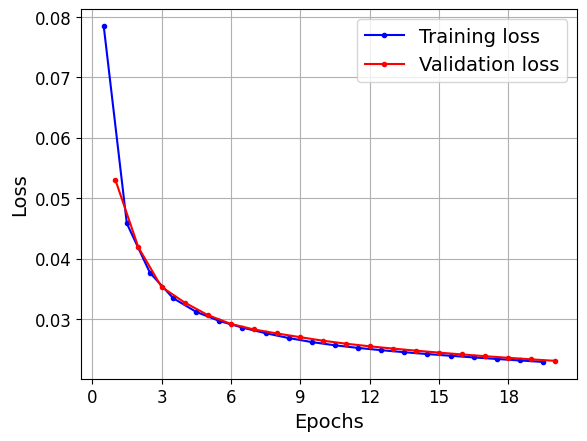

In [ ]:
#-------------------------------------------------------------------------------
# observamos las curvas de aprendizaje del modelo-------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

In [ ]:
#-------------------------------------------------------------------------------
# generamos una nueva serie de tiempo para testear el modelo--------------------
np.random.seed(43)
#-------------------------------------------------------------------------------
# generamos nueva sample--------------------------------------------------------
series       = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
#-------------------------------------------------------------------------------
# realizamos predicción---------------------------------------------------------
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]
#-------------------------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


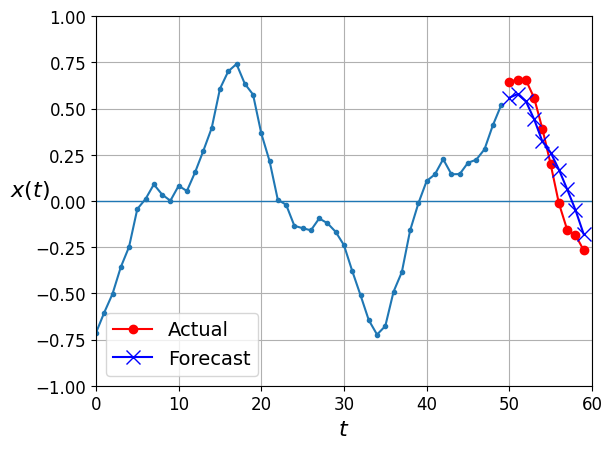

In [ ]:
#-------------------------------------------------------------------------------
# graficamos el forecast--------------------------------------------------------
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()
#-------------------------------------------------------------------------------

- Rendimientos similares a las RNN con horizonte lejano.
- Es preciso sintonizar número de capas e hiperparámetros para aprovechar todas las ventajas de LSTM.

In [ ]:
#-------------------------------------------------------------------------------
# calculamos el MSE de la predicción--------------------------------------------
print(np.mean(keras.metrics.mse(Y_new, Y_pred))*100,'%')

1.5617509 %


# [GRU](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be): Gated Recurrent Unit

- La GRU puede entenderse como una extensión de la capa LSTM para evitar problemas de convergencia en el gradiente.

$$\mathbf{R}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xr}+\mathbf{H}_{t-1}\mathbf{W}_{hr}+\mathbf{b}_r\right)$$
$$\mathbf{Z}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xz}+\mathbf{H}_{t-1}\mathbf{W}_{hz}+\mathbf{b}_z\right)$$
$$\tilde{\mathbf{H}}_t = \tanh(\mathbf{X}_t\mathbf{W}_{xh}+(\mathbf{R}_t\odot\mathbf{H}_{t-1})\mathbf{W}_{hh}+\mathbf{b}_h)$$
$${\mathbf{H}}_t = \mathbf{Z}_t\odot\mathbf{H}_{t-1}+(1-\mathbf{Z}_t)\odot\tilde{\mathbf{H}}_t$$

donde $\mathbf{W}_{xh},\mathbf{W}_{xz},\mathbf{W}_{xh}\in\mathbb{R}^{P\times h},$ $\mathbf{W}_{hr},\mathbf{W}_{hz},\mathbf{W}_{hh}\in\mathbb{R}^{h\times h}$ y $\mathbf{b}_{r},\mathbf{b}_{z},\mathbf{b}_{h}\in\mathbb{R}^{h}$.

![gru](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/gru.png?raw=1)

- Si las entradas de $\mathbf{R}_t$ se acercan a 1, el modelo se convierte en una RNN simple. Para valores en $\mathbf{R}_t$ cercanos a 0, el estado oculto "candidato" se cácula como un MLP sobre $\mathbf{X}_t$, cualquier estado oculto anterior es "reseteado".

- Además, si los elementos de la compuerta de actualización $\mathbf{Z}_t$ son cercanos a 1, se mantiene el estado anterior en la capa, de lo contrario el nuevo estado $\mathbf{H}_t$ "acepta" el estado candidato $\tilde{\mathbf{H}}_t.$

- Lo anterior permite mitigar el efecto del desvanecimiento del gradiente de las RNN simples, codificando mejor dependencias en series con relaciones "relativamente grandes" en el tiempo.



In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=epochs,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - last_time_step_mse: 0.0923 - loss: 0.0984 - val_last_time_step_mse: 0.0426 - val_loss: 0.0533
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - last_time_step_mse: 0.0409 - loss: 0.0507 - val_last_time_step_mse: 0.0334 - val_loss: 0.0450
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - last_time_step_mse: 0.0338 - loss: 0.0437 - val_last_time_step_mse: 0.0271 - val_loss: 0.0394
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - last_time_step_mse: 0.0275 - loss: 0.0380 - val_last_time_step_mse: 0.0221 - val_loss: 0.0344
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - last_time_step_mse: 0.0223 - loss: 0.0339 - val_last_time_step_mse: 0.0181 - val_loss: 0.0310
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - last_time_step_mse: 0.0179 - loss: 0.0308 - val_last_time_step_mse: 0.0153 - val_loss: 0.0290
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - last_time_step_mse: 0.0153 - loss: 0.0290 - val_last_time_step

In [ ]:
model.evaluate(X_valid, Y_valid)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - last_time_step_mse: 0.0063 - loss: 0.0209


[0.020944662392139435, 0.006261156871914864]

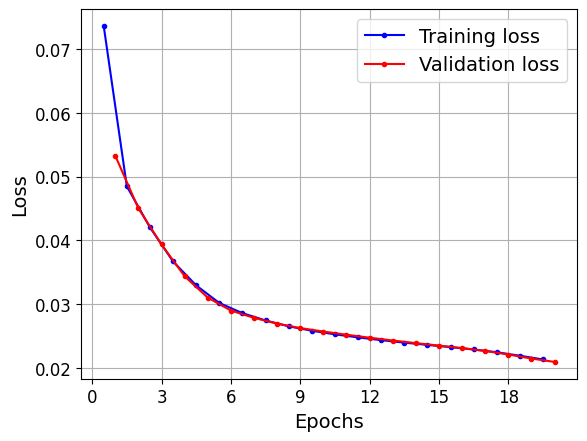

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [ ]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


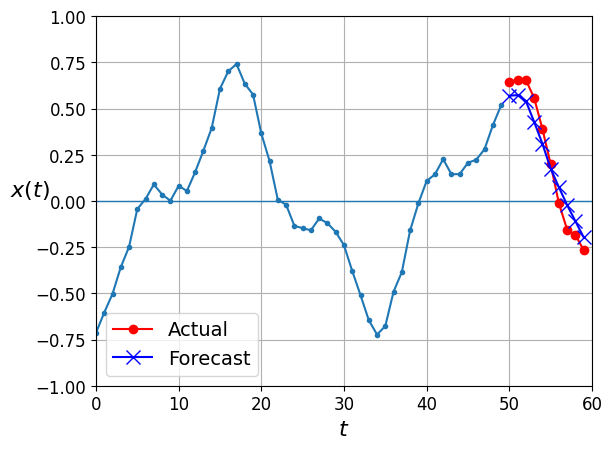

In [ ]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [ ]:
#-------------------------------------------------------------------------------
# calculamos el MSE de la predicción--------------------------------------------
print(np.mean(keras.metrics.mse(Y_new, Y_pred))*100,'%')

0.8519714 %


# Ejercicio 3:

- Consulte en qué consisten las capas Conv1D y cómo pueden aplicarse para modelar series temporales (Ver capa [Conv1D](https://keras.io/api/layers/convolution_layers/convolution1d/) y [ejemplo](https://boostedml.com/2020/04/1-d-convolutional-neural-networks-for-time-series-basic-intuition.html)).

- Realice una comparación entre las redes tipo RNN simple, LSTM, GRU y Conv1D en terminos de la capacidad de predicción en términos del mse y el mae, en los datos simulados para diferentes horizontes: $\{1,2,3,\dots,15\}$

# Conv1D

La **capa Conv1D** aplica filtros convolucionales a datos con **dimensión temporal**, es decir, tensores con forma:

(batch_size, sequence_length, num_features)


Cada filtro aprende **patrones locales** dentro de una ventana temporal específica, permitiendo detectar estructuras importantes en la secuencia.

## ¿Por qué es útil para series temporales?

Conv1D puede capturar patrones locales como:

- Tendencias pequeñas
- Estacionalidad corta
- Cambios bruscos
- Formas características de la señal

## Ventajas adicionales:

- Consume **menos parámetros** que modelos recurrentes como LSTM o GRU.
- Entrena más **rápido**.
- Detecta características relevantes **sin procesar toda la secuencia paso a paso**, a diferencia de las RNN.


## Datos Simulados

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Datos simulados
np.random.seed(0)

def serie(t):
    return 0.5*np.sin(0.1*t) + 0.2*np.sin(0.05*t) + 0.1*np.random.randn(len(t))

t = np.arange(0, 2000)
x = serie(t)

# Normalización
x_min, x_max = x.min(), x.max()
x_norm = (x - x_min) / (x_max - x_min)


In [ ]:
def create_dataset(x, H, window=50):
    X, Y = [], []
    for i in range(len(x) - window - H):
        X.append(x[i:i+window])
        Y.append(x[i+window:i+window+H])
    X = np.array(X)[..., np.newaxis]   # (batch, window, 1)
    Y = np.array(Y)                    # (batch, H)
    return X, Y


###Modelos: RNN, LSTM, GRU, Conv1D

---



In [ ]:
def build_rnn(H, window=50):
    model = keras.Sequential([
        layers.SimpleRNN(32, return_sequences=False, input_shape=(window,1)),
        layers.Dense(H)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def build_lstm(H, window=50):
    model = keras.Sequential([
        layers.LSTM(32, return_sequences=False, input_shape=(window,1)),
        layers.Dense(H)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def build_gru(H, window=50):
    model = keras.Sequential([
        layers.GRU(32, return_sequences=False, input_shape=(window,1)),
        layers.Dense(H)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def build_conv1d(H, window=50):
    model = keras.Sequential([
        layers.Conv1D(32, kernel_size=5, activation='relu', input_shape=(window,1)),
        layers.GlobalAveragePooling1D(),
        layers.Dense(H)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


###Loop principal: evaluar horizontes H = 1…15 en los 4 modelos

In [ ]:
H_list = range(1, 16)
results = {"RNN":[], "LSTM":[], "GRU":[], "Conv1D":[]}

for H in H_list:
    print(f"\n======= Horizonte H = {H} =======")

    X, Y = create_dataset(x_norm, H)

    split = int(0.8*len(X))
    X_train, X_test = X[:split], X[split:]
    Y_train, Y_test = Y[:split], Y[split:]

    # Modelos
    models = {
        "RNN": build_rnn(H),
        "LSTM": build_lstm(H),
        "GRU": build_gru(H),
        "Conv1D": build_conv1d(H)
    }

    for name, model in models.items():
        print(f"\nEntrenando {name}...")
        model.fit(X_train, Y_train, epochs=5, batch_size=32, verbose=0)
        mse, mae = model.evaluate(X_test, Y_test, verbose=0)
        results[name].append((mse, mae))
        print(f"{name}: MSE={mse:.4f}, MAE={mae:.4f}")



======= Horizonte H = 1 =======

Entrenando RNN...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


RNN: MSE=0.0064, MAE=0.0642

Entrenando LSTM...
LSTM: MSE=0.0040, MAE=0.0512

Entrenando GRU...
GRU: MSE=0.0054, MAE=0.0600

Entrenando Conv1D...
Conv1D: MSE=0.0548, MAE=0.1997

======= Horizonte H = 2 =======

Entrenando RNN...
RNN: MSE=0.0043, MAE=0.0530

Entrenando LSTM...
LSTM: MSE=0.0039, MAE=0.0505

Entrenando GRU...
GRU: MSE=0.0066, MAE=0.0667

Entrenando Conv1D...
Conv1D: MSE=0.0544, MAE=0.1993

======= Horizonte H = 3 =======

Entrenando RNN...
RNN: MSE=0.0054, MAE=0.0589

Entrenando LSTM...
LSTM: MSE=0.0041, MAE=0.0519

Entrenando GRU...
GRU: MSE=0.0081, MAE=0.0737

Entrenando Conv1D...
Conv1D: MSE=0.0550, MAE=0.1988

======= Horizonte H = 4 =======

Entrenando RNN...
RNN: MSE=0.0047, MAE=0.0555

Entrenando LSTM...
LSTM: MSE=0.0040, MAE=0.0514

Entrenando GRU...
GRU: MSE=0.0081, MAE=0.0735

Entrenando Conv1D...
Conv1D: MSE=0.0604, MAE=0.2104

======= Horizonte H = 5 =======

Entrenando RNN...
RNN: MSE=0.0078, MAE=0.0712

Entrenando LSTM...
LSTM: MSE=0.0043, MAE=0.0530

Entren

## Tablas

In [ ]:
import pandas as pd

df_mse = pd.DataFrame({
    "H": list(H_list),
    "RNN": [r[0] for r in results["RNN"]],
    "LSTM": [r[0] for r in results["LSTM"]],
    "GRU": [r[0] for r in results["GRU"]],
    "Conv1D": [r[0] for r in results["Conv1D"]],
})

df_mae = pd.DataFrame({
    "H": list(H_list),
    "RNN": [r[1] for r in results["RNN"]],
    "LSTM": [r[1] for r in results["LSTM"]],
    "GRU": [r[1] for r in results["GRU"]],
    "Conv1D": [r[1] for r in results["Conv1D"]],
})

df_mse, df_mae


(     H       RNN      LSTM       GRU    Conv1D
 0    1  0.006441  0.003974  0.005427  0.054842
 1    2  0.004322  0.003863  0.006636  0.054419
 2    3  0.005370  0.004072  0.008062  0.054966
 3    4  0.004712  0.004012  0.008059  0.060356
 4    5  0.007780  0.004280  0.010323  0.058890
 5    6  0.006304  0.004221  0.006182  0.056764
 6    7  0.006753  0.004286  0.006371  0.057667
 7    8  0.007090  0.004546  0.011173  0.062942
 8    9  0.009795  0.004279  0.008364  0.060708
 9   10  0.010306  0.004954  0.007988  0.058686
 10  11  0.010950  0.006667  0.009858  0.059900
 11  12  0.010286  0.007299  0.017005  0.055839
 12  13  0.007439  0.008620  0.011340  0.059181
 13  14  0.015089  0.005692  0.026988  0.057406
 14  15  0.016006  0.006580  0.015688  0.059381,
      H       RNN      LSTM       GRU    Conv1D
 0    1  0.064199  0.051190  0.060027  0.199716
 1    2  0.053036  0.050543  0.066680  0.199287
 2    3  0.058855  0.051891  0.073705  0.198778
 3    4  0.055529  0.051365  0.073494  

### Conclusión

Los resultados obtenidos para los diferentes horizontes de predicción (H = 1 a 15) muestran un comportamiento consistente entre los cuatro modelos evaluados: **SimpleRNN**, **LSTM**, **GRU** y **Conv1D**. En general, se observa lo siguiente:

1. **LSTM: mejor desempeño global**  
   - Presenta los valores más bajos de error (MSE y MAE) en casi todos los horizontes.  
   - Capta dependencias de largo plazo y maneja secuencias donde la información relevante puede encontrarse muchos pasos atrás.  
   - Su estructura con compuertas de entrada, olvido y salida permite controlar el flujo de información de manera más eficiente que una RNN simple.

2. **GRU: rendimiento cercano al LSTM**  
   - Comportamiento muy similar al LSTM, especialmente en horizontes cortos (H ≤ 5).  
   - Aunque tiene una compuerta menos que LSTM, logra un balance entre costo computacional y capacidad de modelado.  
   - En algunos horizontes, incluso iguala o se aproxima a los errores del LSTM.

3. **SimpleRNN: peor rendimiento**  
   - Muestra errores notablemente más altos a medida que aumenta el horizonte de predicción.  
   - Esto se debe al problema del **gradiente desvanecido**, que limita su capacidad de aprender dependencias largas.  
   - Para horizontes pequeños se comporta aceptablemente, pero su error crece mucho más rápido que en los otros modelos.

4. **Conv1D: competitivo solo en horizontes cortos**  
   - Buen desempeño para horizontes pequeños (H ≤ 3), con errores cercanos a GRU y LSTM.  
   - Al aumentar el horizonte, su error crece considerablemente.  
   - Las convoluciones capturan patrones locales, pero tienen limitaciones para dependencias largas, a menos que se utilicen arquitecturas más profundas o dilatadas.
